## Data Cleaning

In [233]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [165]:
tb = pd.read_csv('Desktop/BA/MGTA 452/Taobao User Behavior Analysis/tianchi_mobile_recommend_train_user.csv')
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
user_id          int64
item_id          int64
behavior_type    int64
user_geohash     object
item_category    int64
time             object
dtypes: int64(4), object(2)
memory usage: 561.1+ MB


In [166]:
tb.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [167]:
tb.duplicated().sum()

4092866

In [168]:
tb.drop_duplicates(inplace=True)

In [169]:
tb.isnull().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     4308015
item_category          0
time                   0
dtype: int64

In [170]:
tb.drop(columns = "user_geohash", inplace = True)

In [171]:
def behavior_type(type):
    if type == 1:
        return 'pv'
    elif type == 2:
        return 'favor'
    elif type == 3:
        return 'cart'
    else:
        return 'buy'
tb['behavior_type'] = tb['behavior_type'].apply(behavior_type)
tb['date'] = tb['time'].apply(lambda x:x.split(' ')[0])
tb['hour'] = tb['time'].apply(lambda x:x.split(' ')[1])
tb.head()

,user_id,item_id,behavior_type,item_category,time,date,hour
0,98047837,232431562,pv,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,pv,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,pv,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,pv,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,pv,13926,2014-12-16 21,2014-12-16,21


In [172]:
tb['date']=pd.to_datetime(tb['date'])
tb['time']=pd.to_datetime(tb['time'])
tb['hour']=tb['hour'].astype('int64')
tb.dtypes

user_id                   int64
item_id                   int64
behavior_type            object
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

In [173]:
tb.to_csv('tb_user_2014.csv',index = False)
tb.drop_duplicates('user_id').count() 

user_id          10000
item_id          10000
behavior_type    10000
item_category    10000
time             10000
date             10000
hour             10000
dtype: int64

## 转化率和用户购买次数

In [174]:
tb_behavior_type = tb['behavior_type'].value_counts()

In [175]:
tb_behavior_type

pv       7479078
cart      333371
favor     240919
buy       110672
Name: behavior_type, dtype: int64

用户的从点击到收藏和加入购物车的转化率：

In [176]:
(tb_behavior_type['favor'] + tb_behavior_type['cart'])/tb_behavior_type['pv']

0.07678620279130663

用户从点击到购买的转化率：

In [177]:
tb_behavior_type['buy']/tb_behavior_type['pv']

0.01479754590071129

用户从加入购物车和收藏到购买的转化率：

In [178]:
tb_behavior_type['buy']/(tb_behavior_type['favor'] + tb_behavior_type['cart'])

0.1927109996691567

付费用户占比：

In [179]:
tb_buy = tb[tb['behavior_type'] == 'buy']
tb_buy.drop_duplicates('user_id').count()/10000

user_id          0.8886
item_id          0.8886
behavior_type    0.8886
item_category    0.8886
time             0.8886
date             0.8886
hour             0.8886
dtype: float64

一个月的时间内复购率：

In [180]:
tb_two_buy = tb_buy.groupby('user_id').count()
tb_two_buy[tb_two_buy['behavior_type'] >= 2].count()/10000

item_id          0.8126
behavior_type    0.8126
item_category    0.8126
time             0.8126
date             0.8126
hour             0.8126
dtype: float64

用户每月平均购买次数：

In [181]:
tb_two_buy.sort_values('behavior_type',ascending=False)['behavior_type'].mean()

12.45464776052217

In [182]:
tb_two_buy.sort_values('behavior_type',ascending=False)['behavior_type'].describe()

count    8886.000000
mean       12.454648
std        17.734442
min         1.000000
25%         4.000000
50%         8.000000
75%        16.000000
max       770.000000
Name: behavior_type, dtype: float64

In [183]:
tb_two_buy.sort_values('behavior_type',ascending=False)['behavior_type'].median()

8.0

## 时间维度图表分析

pv和uv

pv(访问量)：即Page View, 具体是指网站的是页面浏览量或者点击量，页面被刷新一次就计算一次。

uv(独立访客)：即Unique Visitor,访问您网站的一台电脑客户端为一个访客。

日pv和日uv

Text(0.5, 1.0, 'uv_daily')

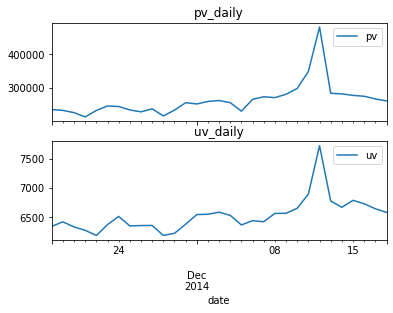

In [219]:
pv_daily=tb.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_daily=tb.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_daily.plot(x='date',y='pv',ax=axes[0])
uv_daily.plot(x='date',y='uv',ax=axes[1])
axes[0].set_title('pv_daily')
axes[1].set_title('uv_daily')

周pv和周uv

In [240]:
tb['weekday'] = tb['date'].apply(lambda x:x.weekday())

Text(0.5, 1.0, 'uv_weekday')

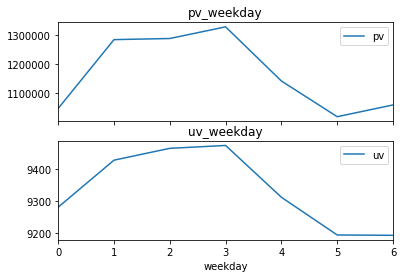

In [239]:
pv_weekday=tb.groupby('weekday')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_weekday=tb.groupby('weekday')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_weekday.plot(x='weekday',y='pv',ax=axes[0])
uv_weekday.plot(x='weekday',y='uv',ax=axes[1])
axes[0].set_title('pv_weekday')
axes[1].set_title('uv_weekday')

每小时pv和uv

Text(0.5, 1.0, 'uv_hour')

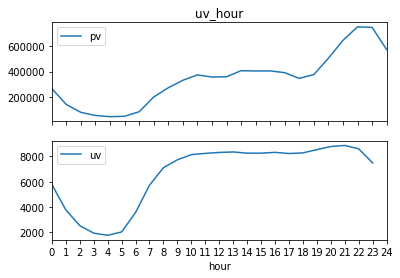

In [220]:
pv_hour=tb.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_hour=tb.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig,axes=plt.subplots(2,1,sharex=True)
pv_hour.plot(x='hour',y='pv',ax=axes[0])
uv_hour.plot(x='hour',y='uv',ax=axes[1])
x=range(0,25,1)
plt.xticks(x)
axes[0].set_title('pv_hour')
axes[0].set_title('uv_hour')

用户不同行为类型的pv分析

Text(0.5, 1.0, 'pv_different_behavior_type_except1')

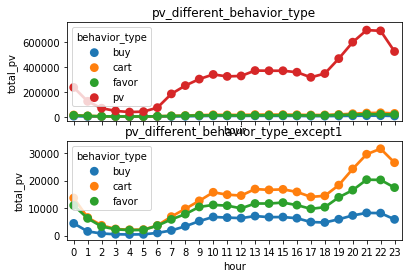

In [223]:
pv_detail=tb.groupby(['behavior_type','hour'])['user_id'].count().reset_index().rename(columns={'user_id':'total_pv'})
fig,axes=plt.subplots(2,1,sharex=True)
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail,ax=axes[0])
sns.pointplot(x='hour',y='total_pv',hue='behavior_type',data=pv_detail[pv_detail.behavior_type!='pv'],ax=axes[1])
axes[0].set_title('pv_different_behavior_type')
axes[1].set_title('pv_different_behavior_type_except1')

## RFM

In [184]:
tb_buy.to_csv('tb_buy.csv',index = False)
tb_buy['date'] = tb_buy['date'].apply(pd.to_datetime)

/Users/tianqicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


构造R值

In [185]:
tb_buy_rfm = tb_buy[['user_id','date']]
tb_buy_rfm.head()

,user_id,date
148,101260672,2014-11-25
152,116730636,2014-12-17
158,104811265,2014-12-01
185,106230218,2014-12-03
207,100684618,2014-11-23


In [186]:
r = tb_buy_rfm.groupby('user_id')['date'].max().reset_index()
r.head()

,user_id,date
0,4913,2014-12-16
1,6118,2014-12-17
2,7528,2014-12-13
3,7591,2014-12-13
4,12645,2014-12-14


In [187]:
r['R'] = (pd.to_datetime('2014-12-19') - r['date']).dt.days
r.head()

,user_id,date,R
0,4913,2014-12-16,3
1,6118,2014-12-17,2
2,7528,2014-12-13,6
3,7591,2014-12-13,6
4,12645,2014-12-14,5


构造F值

In [188]:
buy_tb = tb_buy.groupby('user_id')['behavior_type'].count().reset_index()
buy_tb['behavior_type'].describe()

count    8886.000000
mean       12.454648
std        17.734442
min         1.000000
25%         4.000000
50%         8.000000
75%        16.000000
max       770.000000
Name: behavior_type, dtype: float64

合并用户一天内的多次消费为一次消费

In [189]:
tb_buy_rfm['date_str'] = tb_buy_rfm['date'].astype(str)

/Users/tianqicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
tb_buy_rfm

,user_id,date,date_str
148,101260672,2014-11-25,2014-11-25
152,116730636,2014-12-17,2014-12-17
158,104811265,2014-12-01,2014-12-01
185,106230218,2014-12-03,2014-12-03
207,100684618,2014-11-23,2014-11-23
...,...,...,...
12256125,60734132,2014-12-15,2014-12-15
12256257,62781637,2014-12-17,2014-12-17
12256278,62781637,2014-12-11,2014-12-11
12256310,62781637,2014-11-28,2014-11-28


In [191]:
dup_f = tb_buy_rfm.groupby(['user_id','date_str'])['date'].count().reset_index()

In [192]:
f = dup_f.groupby('user_id')['date'].count().reset_index()

In [193]:
f.columns = ['user_id','frequency_buy']
f.head()

,user_id,frequency_buy
0,4913,5
1,6118,1
2,7528,6
3,7591,9
4,12645,4


将r,f合并

In [194]:
rfm = pd.merge(r,f,left_on = 'user_id',right_on = 'user_id',how = 'inner')
rfm.head()

,user_id,date,R,frequency_buy
0,4913,2014-12-16,3,5
1,6118,2014-12-17,2,1
2,7528,2014-12-13,6,6
3,7591,2014-12-13,6,9
4,12645,2014-12-14,5,4


In [195]:
rfm['frequency_buy'].mean()

5.53691199639883

In [196]:
rfm['R_score'] = pd.cut(rfm['R'],bins = [0,3,5,10,20,50],labels=[5,4,3,2,1],right=False).astype(float)
rfm['F_score'] = pd.cut(rfm['frequency_buy'],bins = [1,2,6,10,15,50],labels=[1,2,3,4,5],right=False).astype(float)
rfm.head()

,user_id,date,R,frequency_buy,R_score,F_score
0,4913,2014-12-16,3,5,4.0,2.0
1,6118,2014-12-17,2,1,5.0,1.0
2,7528,2014-12-13,6,6,3.0,3.0
3,7591,2014-12-13,6,9,3.0,3.0
4,12645,2014-12-14,5,4,3.0,2.0


In [197]:
rfm['R>mean'] = (rfm['R'] > rfm['R'].mean()) * 1
rfm['F>mean'] = (rfm['frequency_buy'] > rfm['frequency_buy'].mean()) * 1
rfm.head()

,user_id,date,R,frequency_buy,R_score,F_score,R>mean,F>mean
0,4913,2014-12-16,3,5,4.0,2.0,0,0
1,6118,2014-12-17,2,1,5.0,1.0,0,0
2,7528,2014-12-13,6,6,3.0,3.0,0,1
3,7591,2014-12-13,6,9,3.0,3.0,0,1
4,12645,2014-12-14,5,4,3.0,2.0,0,0


用户分类

In [198]:
rfm['user_value'] = (rfm['R>mean'] * 10) + (rfm['F>mean'] * 1)

In [199]:
def user_value(x):
    if x == 0:
        return '重要挽留客户'
    elif x == 1:
        return '重要保持客户'
    elif x == 10:
        return '重要发展客户'
    else:
        return '重要价值客户'
rfm['user_catergory'] = rfm['user_value'].apply(user_value)
rfm.head()

,user_id,date,R,frequency_buy,R_score,F_score,R>mean,F>mean,user_value,user_catergory
0,4913,2014-12-16,3,5,4.0,2.0,0,0,0,重要挽留客户
1,6118,2014-12-17,2,1,5.0,1.0,0,0,0,重要挽留客户
2,7528,2014-12-13,6,6,3.0,3.0,0,1,1,重要保持客户
3,7591,2014-12-13,6,9,3.0,3.0,0,1,1,重要保持客户
4,12645,2014-12-14,5,4,3.0,2.0,0,0,0,重要挽留客户


In [200]:
rfm_user_cat = rfm['user_catergory'].value_counts().reset_index()
rfm_user_cat

,index,user_catergory
0,重要保持客户,3081
1,重要发展客户,2917
2,重要挽留客户,2299
3,重要价值客户,589


## 商品销售情况

In [201]:
tb_item = tb_buy['item_id'].value_counts().reset_index()
tb_item.columns = ['item_id','num_of_sales']
tb_item.count()

item_id         92753
num_of_sales    92753
dtype: int64

In [202]:
tb_item_num = tb_item['num_of_sales'].value_counts().reset_index()
tb_item_num.columns = ['num_of_sales','num_of_items']
tb_item_num.to_csv('tb_item_num.csv',index = False)

In [245]:
tb_category = tb[tb['behavior_type'] == 'buy']['item_category'].value_counts().reset_index()
tb_category.columns = ['item_category','num_of_sales']

item_category    4665
num_of_sales     4665
dtype: int64

In [248]:
tb_category.to_csv('tb_category_num.csv', index = False)
tb_category

,item_category,num_of_sales
0,1863,1936
1,6344,1661
2,5232,1468
3,6977,1086
4,5399,1030
...,...,...
4660,2468,1
4661,2340,1
4662,101,1
4663,10144,1


不同商品的购买次数

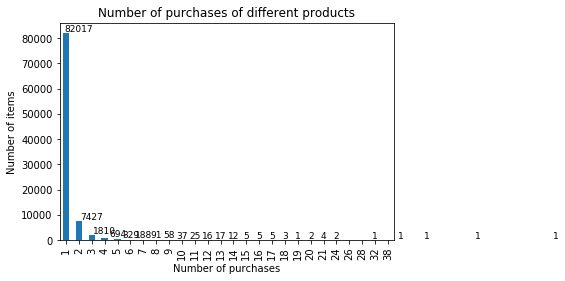

In [228]:
item_id_total=tb[tb.behavior_type=='buy'].item_id.value_counts().reset_index().rename(columns={'index':"item_id",'item_id':'total'}).groupby('total').item_id.count()
item_id_total.plot(kind='bar')
#matplotlib.rcParams['font.family']='SimHei'   #设置字体（设置之后中文不会乱码）
plt.title('Number of purchases of different products')
plt.xlabel('Number of purchases')
plt.ylabel('Number of items')
for a,b in zip(item_id_total.index,item_id_total.values):
    plt.text(a, b, b, ha='center', va= 'bottom',fontsize=9)

In [241]:
tb_item_num

,num_of_sales,num_of_items
0,1,82017
1,2,7427
2,3,1810
3,4,694
4,5,329
5,6,188
6,7,91
7,8,58
8,9,37
9,10,25


商品点击数前20

In [249]:
tb_pv = tb[tb['behavior_type'] == 'pv'].groupby(
    'item_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending = False)
tb_pv_20 = tb_pv.head(20)
tb_pv_20.to_csv('tb_pv_20.csv', index = False)
tb_pv_20

,item_id,behavior_type
801453,112921337,939
692928,97655171,772
2752405,387911330,659
958136,135104537,615
15926,2217535,532
909662,128186279,527
40697,5685392,505
1954193,275450912,495
100069,14087919,482
1485356,209323160,481


商品点击数前20里面各自的购买数

In [255]:
tb_pv_20_item_id = tb_pv_20["item_id"]

In [258]:
tb_pv_20_buy = tb_buy[tb_buy.item_id.isin(tb_pv_20_item_id)]
tb_pv_20_buy.to_csv('tb_pv_20_buy.csv', index = False)
tb_pv_20_buy

,item_id,behavior_type
69477,303205878,38
3140,14087919,32
88893,387911330,19
22388,97655171,13
80996,353381230,5
1290,5685392,2
4791,21087251,2
1511,6703599,2
63641,277922302,1
85745,374235261,1


In [260]:
tb_pv_20_buy_merged = pd.merge(tb_pv_20,tb_buy,on='item_id',how='inner')
tb_pv_20_buy_merged.to_csv('tb_pv_20_buy_merged.csv', index = False)
tb_pv_20_buy_merged

,item_id,behavior_type_x,behavior_type_y
0,112921337,939,1
1,97655171,772,13
2,387911330,659,19
3,2217535,532,1
4,128186279,527,1
5,5685392,505,2
6,14087919,482,32
7,277922302,477,1
8,374235261,464,1
9,6703599,402,2


商品加入购物车数前20

In [204]:
tb_cart = tb[tb['behavior_type'] == 'cart'].groupby(
    'item_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending = False)
tb_cart_20 = tb_cart.head(20)
tb_cart_20

,item_id,behavior_type
51606,83098075,56
187461,303205878,43
211429,341889939,35
8789,14087919,33
231430,374214353,31
44734,72183675,30
218493,353381230,30
210675,340693758,28
129609,209323160,26
78058,125666923,23


商品收藏数前20

In [205]:
tb_favor = tb[tb['behavior_type'] == 'favor'].groupby(
    'item_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending = False)
tb_favor_20 = tb_favor.head(20)
tb_favor_20

,item_id,behavior_type
140696,277922302,24
170720,336964100,18
192036,378505512,18
3392,6703599,17
66960,132473636,17
144590,285375507,16
119538,236236780,15
54637,108385699,15
140040,276636269,15
7142,14087919,15


商品购买数前20

In [206]:
tb_buy = tb[tb['behavior_type'] == 'buy'].groupby(
    'item_id')['behavior_type'].count().reset_index().sort_values('behavior_type',ascending = False)
tb_buy_20 = tb_buy.head(20)
tb_buy_20.to_csv('tb_buy_20.csv', index = False)
tb_buy_20 

,item_id,behavior_type
69477,303205878,38
3140,14087919,32
38344,167074648,28
26432,115124482,26
55529,243091690,24
3849,17065447,21
75989,331710542,21
19047,83098075,20
16544,72183675,20
40518,176556528,20


商品类目销售情况

此处有个图

In [207]:
pd.merge(tb_buy_20,tb_pv_20,on='item_id',how='inner') 

,item_id,behavior_type_x,behavior_type_y
0,303205878,38,340
1,14087919,32,482
2,387911330,19,659


In [208]:
pd.merge(tb_cart_20,tb_pv_20,on='item_id',how='inner') 

,item_id,behavior_type_x,behavior_type_y
0,303205878,43,340
1,14087919,33,482
2,353381230,30,394
3,209323160,26,481


In [209]:
pd.merge(tb_favor_20,tb_pv_20,on='item_id',how='inner')

,item_id,behavior_type_x,behavior_type_y
0,277922302,24,477
1,6703599,17,402
2,14087919,15,482
3,211781109,14,392


In [210]:
pd.merge(tb_favor_20,tb_buy_20,on='item_id',how='inner')

,item_id,behavior_type_x,behavior_type_y
0,14087919,15,32


In [211]:
pd.merge(tb_cart_20,tb_buy_20,on='item_id',how='inner')

,item_id,behavior_type_x,behavior_type_y
0,83098075,56,20
1,303205878,43,38
2,14087919,33,32
3,374214353,31,19
4,72183675,30,20


## 影响用户购买的流程因素

点击购买

In [212]:
pd.merge(tb_pv,tb_buy,on='item_id',how='inner').count()

item_id            89786
behavior_type_x    89786
behavior_type_y    89786
dtype: int64

点击-收藏-购买

In [213]:
tb_pv_favor = pd.merge(tb_pv,tb_favor,on='item_id',how='inner')
tb_pv_favor_buy = pd.merge(tb_pv_favor,tb_buy,on='item_id',how = 'inner').count()
tb_pv_favor_buy

item_id            19869
behavior_type_x    19869
behavior_type_y    19869
behavior_type      19869
dtype: int64

点击-加入购物车-购买

In [214]:
tb_pv_cart = pd.merge(tb_pv,tb_cart,on='item_id',how='inner')
tb_pv_cart_buy = pd.merge(tb_pv_cart,tb_buy,on='item_id',how = 'inner').count()
tb_pv_cart_buy

item_id            61102
behavior_type_x    61102
behavior_type_y    61102
behavior_type      61102
dtype: int64

点击-收藏-加入购物车-购买

In [215]:
tb_pv_favor = pd.merge(tb_pv,tb_favor,on='item_id',how='inner')
tb_pv_favor_cart = pd.merge(tb_pv_favor,tb_cart,on='item_id',how = 'inner')
tb_pv_favor_cart_buy = pd.merge(tb_pv_favor_cart,tb_buy,on='item_id',how = 'inner').count()
tb_pv_favor_cart_buy

item_id            13892
behavior_type_x    13892
behavior_type_y    13892
behavior_type_x    13892
behavior_type_y    13892
dtype: int64